In [1]:
NAME = "Michael Cornelisse"
STUDENT_NUMBER = "s1059020"
COLLABORATOR_NAME = "Nienke Helmers"
COLLABORATOR_STUDENT_NUMBER = "s1016904"

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from toolbox.pca_plot import get_variance_percentage, get_number_of_attributes, plot_pca_variance, get_pca_data_sets
from toolbox.data_processing import load_data, clean_data, sort_X_train_and_test_data, get_y_train_and_test_data
from toolbox.gradient_search import grid_search_classifier

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [14]:
X_train, X_test, y = load_data()

In [15]:
# Clean data
X_train, X_test, y = clean_data(X_train, X_test, y)

In [16]:
# Sort the indexes
X_train, X_test = sort_X_train_and_test_data(X_train, X_test)
y.index = pd.to_numeric(y.index)
y_train, y_test = get_y_train_and_test_data(y)

In [17]:
pca = PCA()
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

pca_complete = np.append(pca_train, pca_test, 0)
pca.n_components_

38

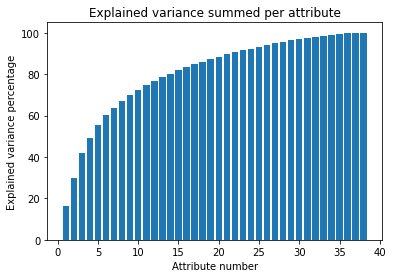

Figure: A plot of the explained variance. The variance is summed for all attributes up to and including
    the current attribute number,for examplethe tenth attribute shows the sum of attributes 1 to 10.
There are 21 attributes that together explain 90% of the variance.


In [18]:
pca_variance_percentage = get_variance_percentage(pca)
no_attributes = get_number_of_attributes(pca_variance_percentage)
plot_pca_variance(pca_variance_percentage, no_attributes)

In [19]:
pca_data, pca_train, pca_test = get_pca_data_sets(pca_complete, no_attributes)

In [10]:
parameters_tree = {
    'max_depth' : [2, 4, 6, 10, 'None'],
    'min_samples_leaf' : [2, 4, 6],
    'criterion' : ['gini', 'entropy'],
    'random_state' : ['None', 10, 42]
}

predictions_tree, dtc = grid_search_classifier('tree', parameters_tree, pca_train, pca_test, y_train, y_test, True)

The best parameters for this model are: 
DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=10)
This gives an accuracy of 0.7941176470588235 and an error of 0.20588235294117652


,param_criterion,param_max_depth,param_min_samples_leaf,param_random_state,mean_train_score,std_train_score
0,gini,2,2,None,NaN,NaN
1,gini,2,2,10,0.950336,0.013273
2,gini,2,2,42,0.950336,0.013273
3,gini,2,4,None,NaN,NaN
4,gini,2,4,10,0.935630,0.017771
5,gini,2,4,42,0.935630,0.017771
6,gini,2,6,None,NaN,NaN
7,gini,2,6,10,0.894790,0.013914
8,gini,2,6,42,0.894790,0.013914
9,gini,4,2,None,NaN,NaN


In [11]:
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()
parameters_rf = {
    'max_depth' : [2, 4, 6, 'None'],
    'n_estimators' : [250, 300, 350, 400],
    'min_samples_leaf' : [2, 4, 6],
    'criterion' : ['gini', 'entropy'],
    'random_state' : ['None', 10, 42]
}
predictions_rf, rf = grid_search_classifier('rf', parameters_rf, pca_train, pca_test, y_train_np.ravel(), y_test_np.ravel(), True)


The best parameters for this model are: 
RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=250,
                       random_state=42)
This gives an accuracy of 0.8529411764705882 and an error of 0.1470588235294118


,param_criterion,param_n_estimators,param_max_depth,param_min_samples_leaf,param_random_state,mean_train_score,std_train_score
0,gini,250,2,2,None,NaN,NaN
1,gini,250,2,2,10,0.994286,0.011429
2,gini,250,2,2,42,1.000000,0.000000
3,gini,300,2,2,None,NaN,NaN
4,gini,300,2,2,10,1.000000,0.000000
5,gini,300,2,2,42,1.000000,0.000000
6,gini,350,2,2,None,NaN,NaN
7,gini,350,2,2,10,1.000000,0.000000
8,gini,350,2,2,42,1.000000,0.000000
9,gini,400,2,2,None,NaN,NaN


In [12]:
parameters_xgb = {
    'max_depth' : [2, 4, 6, 'None'],
    'n_estimators' : [450, 500, 550, 600],
    'random_state' : ['None', 10, 42],
    'eval_metric': ['rmse','mape', 'auc' 'error'],
    'use_label_encoder' : ['False']
}

predictions_xgb, xb = grid_search_classifier('xgb', parameters_xgb, pca_train, pca_test, y_train_np.ravel(), y_test_np.ravel(), True)

C:\Users\459466\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The best parameters for this model are: 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=450, n_jobs=8,
              num_parallel_tree=1, random_state=10, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder='False', validate_parameters=1, verbosity=None)
This gives an accuracy of 0.8235294117647058 and an error of 0.17647058823529416


,param_eval_metric,param_n_estimators,param_max_depth,param_random_state,mean_train_score,std_train_score
0,rmse,450,2,None,NaN,NaN
1,rmse,450,2,10,1.0,0.0
2,rmse,450,2,42,1.0,0.0
3,rmse,500,2,None,NaN,NaN
4,rmse,500,2,10,1.0,0.0
5,rmse,500,2,42,1.0,0.0
6,rmse,550,2,None,NaN,NaN
7,rmse,550,2,10,1.0,0.0
8,rmse,550,2,42,1.0,0.0
9,rmse,600,2,None,NaN,NaN
